<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_kep_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok képfeldolgozás 1

<https://klajosw.blogspot.com/>


---

# Képállományok feldolgozása Python programmal


##  PIL modul használatával

### Pythonban képek szűrke konverziója


In [0]:
## Pythonban képek Szűrke konverziója
%pylab inline 
from PIL import Image

## Visszaolvasás
img = Image.open(r'c:\Users\User\Documents\kepek\allat\Dsc_8619_mokus.jpg').convert('L')
img.show() # kép megjelenítése

### Using scikit-image's astronaut dataset

print(img.width, img.height, img.mode, img.format, type(img)) # kép méret és formátum miolvaássa kiírása

img.save(r'c:\Users\User\Documents\kepek\allat\Dsc_8619_mokus_szurke2.jpg')



Populating the interactive namespace from numpy and matplotlib
3008 2000 L None <class 'PIL.Image.Image'>


### Pythonban nyissunk meg egy képet, forgassuk el, jelenítsük meg, és írjunk ki róla pár dolgot

In [0]:
## pythonban nyissunk meg egy képet, forgassuk el, jelenítsük meg, és írjunk ki róla pár dolgot
from PIL import Image, TiffImagePlugin, TiffTags
import os, sys
import glob

im = Image.open(r"c:\Users\User\Documents\kepek\allat\Dsc_8619_mokus_szurke2.jpg") ## kép megnyítása
#im.rotate(45).show()                                ## elforgatás és megjelenítése
#im.transpose(Image.FLIP_LEFT_RIGHT).show() 
im.transpose(Image.FLIP_TOP_BOTTOM).show()  # megfordít
#im.transpose(Image.ROTATE_90)
#im.transpose(Image.ROTATE_180)
#im.transpose(Image.ROTATE_270)
print (im.format, im.size, im.mode)                 ## kép info kiírás
print (im.size[0])
print('\n----------------------------\n)')

# munka könyvtár beállítása a képek könyvtárra
os.chdir(r"c:\Users\User\Documents\kepek\allat")
for infile in glob.glob("*.jpg"): ## könyvtár bejárása és jpg képállományok sorra beolvasása
    file, ext = os.path.splitext(infile)
    try:
      im = Image.open(infile)
      if im.size[0] > 200 :  ## kis eredeti meretű képről ne készüljön kiskép
        im.thumbnail((128, 128), Image.ANTIALIAS)
        im.save(file + "_thumbnail.jpg", "JPEG")
        print ('Kiskép elkészült : ', infile,' ->', im.size, im.mode ) 
    except IOError:
        print ("Nem készült kiskép : ", infile,' ->', im.size, im.mode )  

im = Image.open(r"c:\Users\User\Documents\kepek\allat\Dsc_8619_mokus_szurke2.jpg")
croppedIm = im.crop((335, 345, 565, 560))  ## terület kimetszés
croppedIm.show()
croppedIm.save(r"c:\Users\User\Documents\kepek\allat\Dsc_8619_mokus_szurke2_cropped.jpg")


JPEG (3008, 2000) L
3008

----------------------------
)
Kiskép elkészült :  Dsc_8596_mokus.jpg  -> (128, 85) RGB
Kiskép elkészült :  Dsc_8601_mokus.jpg  -> (128, 85) RGB
Kiskép elkészült :  Dsc_8619_mokus.jpg  -> (128, 85) RGB
Kiskép elkészült :  Dsc_8619_mokus_szurke2.jpg  -> (128, 85) L
Kiskép elkészült :  Dsc_8619_mokus_szurke2_cropped.jpg  -> (128, 119) L
Kiskép elkészült :  Dsc_8619_mokus_szurke2_logo.jpg  -> (128, 85) L



#### Különös karakterek karakterláncokban

Kezelni kell néhány más úgynevezett literális karakter, amelynek speciális jelentése van. 

karakter	jelentés
\n	sortörés
\r	kocsi vissza
\t	vízszintes kihagyás (TAB)
\v	függőleges kihagyás (TAB)
\xhh..	hexadecimális karakter hh.. értékkel

### Csoportos képmüveletekhez könyvtár végilolvasás alapok (játek a könyvtárakkal)

In [0]:
## Könyvtár végilolvasásához alapok (játek a könyvtárakkal)
import os, sys

print("Jelenlegi munka könyvtár1 " , os.getcwd())  ## munkakönyvtár kiírása
os.chdir(r"c:\Users\User\Documents\kepek\allat")   ## munkakönyvtár beállítása
print("Jelenlegi munka könyvtár2 " , os.getcwd())  ## munkakönyvtxxár kiírása

## ---------------- könyvtárban levő állományok listába olvasása 1. (walk)
print('------------------- walk')
from os import walk
myfiles = []
mypath=os.getcwd()
for (dirpath, dirnames, filenames) in walk(mypath):  ## kiolvasás
    myfiles.extend(filenames)
    
for i in myfiles:  ## megjelenítés
   print(i)
print('------------------- walk')
# r=root, d=directories, f = files
for r, d, f in os.walk(mypath):
    for file in f:
        if ".jpg" in file:
            print(os.path.join(r, file))

print('-------------------listdir')
## ---------------- könyvtárban levő állományok listába olvasása 2. (listdir)
from os import listdir
from os.path import isfile, join
mypath=os.getcwd()
myfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for i in myfiles:  ## megjelenítés
   print(i)

print('------------------- glob')
## ---------------- könyvtárban levő kép (jpg) állományok listába olvasása 3. (glob)
import glob
myfiles = []
mypath=os.getcwd()
print(mypath)

# myfiles = glob.glob(mypath + r'\*.jpg')    ## közvetlen betöltéssel és teljes elérési névvel
# myfiles = [f for f in glob.glob("*.jpg")]  ## list comprehension-al

for file in glob.glob(r'*.jpg'):  
    myfiles.append(file)

for i in myfiles:  ## megjelenítés
   print(i)

print('------------------- lisdir')
import os
myfiles = [os.path.abspath(x) for x in os.listdir()]  ## teljes elérési névvel
for i in myfiles:  ## megjelenítés
   print(i)


print('------------------- glob és pathlib')

import pathlib

py = pathlib.Path().glob("*.jpg")
for file in py:
    print(file)
 
print('------------------- scandir')
    
import os
with os.scandir() as i:
    for entry in i:
        if entry.is_file():
            print(entry.name)

Jelenlegi munka könyvtár1  c:\Users\User\Documents\kepek\allat
Jelenlegi munka könyvtár2  c:\Users\User\Documents\kepek\allat
------------------- walk
drawing.png
Dsc_8579_roka.jpg
Dsc_8579_roka_thumbnail.jpg
Dsc_8596_mokus.jpg
Dsc_8596_mokus_thumbnail.jpg
Dsc_8601_mokus.jpg
Dsc_8601_mokus_thumbnail.jpg
Dsc_8619_mokus.jpg
Dsc_8619_mokus_szurke2.jpg
Dsc_8619_mokus_szurke2_cropped.jpg
Dsc_8619_mokus_szurke2_cropped_thumbnail.jpg
Dsc_8619_mokus_szurke2_logo.jpg
Dsc_8619_mokus_szurke2_thumbnail.jpg
Dsc_8619_mokus_thumbnail.jpg
python_rajz.png
python_rajz2.png
text_kepbe.png
------------------- walk
c:\Users\User\Documents\kepek\allat\Dsc_8579_roka.jpg
c:\Users\User\Documents\kepek\allat\Dsc_8579_roka_thumbnail.jpg
c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus.jpg
c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus_thumbnail.jpg
c:\Users\User\Documents\kepek\allat\Dsc_8601_mokus.jpg
c:\Users\User\Documents\kepek\allat\Dsc_8601_mokus_thumbnail.jpg
c:\Users\User\Documents\kepek\allat\Dsc_

### Minta alkalmazás 


#### Egy windows felület kereső gombbal és megjelenitő lista terület a képállományokkal melyek kettős klikkelésre megjelennek


In [0]:
import tkinter as tk
import os

def searchfiles(extension='.jpg', folder='c:\\'):
    "insert all files in the listbox"
    for r, d, f in os.walk(folder):
        for file in f:
            if file.endswith(extension):                
                lb.insert(0, r + "\\" + file)

def open_file():
    os.startfile(lb.get(lb.curselection()[0]))

root = tk.Tk()
root.geometry("400x400")
mypath=os.getcwd()
bt = tk.Button(root, text="Search", command=lambda:searchfiles('.jpg', r'c:\Users\User\Documents\kepek\allat'))
bt.pack()
lb = tk.Listbox(root)
lb.pack(fill="both", expand=1)
lb.bind("<Double-Button>", lambda x: open_file())
root.mainloop()


## Python rajz készítés és lementése jpg filebe

In [0]:
## Python rajz készítés és lementése jpg filebe
from PIL import Image, ImageDraw
import os, sys

os.chdir(r"c:\Users\User\Documents\kepek\allat") 
im = Image.new('RGBA', (200, 200), 'white')
draw = ImageDraw.Draw(im)
draw.line([(0, 0), (199, 0), (199, 199), (0, 199), (0, 0)], fill='black')
draw.rectangle((20, 30, 60, 60), fill='blue')
draw.ellipse((120, 30, 160, 60), fill='red')
draw.polygon(((57, 87), (79, 62), (94, 85), (120, 90), (103, 113)), fill='pink')
for i in range(100, 200, 10):
    draw.line([(i, 0), (200, i - 100)], fill='blue')
im.save('python_rajz.png')


In [0]:
## Pythonban szoveg képállományba írása
from PIL import Image, ImageDraw, ImageFont
import os

os.chdir(r"c:\Users\User\Documents\kepek\allat") 
im = Image.new('RGBA', (200, 200), 'white')
draw = ImageDraw.Draw(im)
draw.text((20, 150), 'Üdvözöllek ', fill='purple')
fontsFolder = r'c:\Windows\Fonts' # e.g. 'Library/Fonts'
arialFont = ImageFont.truetype(os.path.join(fontsFolder, 'arial.ttf'), 32)
draw.text((100, 150), 'Lajos', fill='red', font=arialFont)
im.save('text_kepbe.png')

In [0]:
##logos kép készítése
from PIL import Image
import os

os.chdir(r"c:\Users\User\Documents\kepek\allat") 
filename=r"c:\Users\User\Documents\kepek\allat\Dsc_8619_mokus_szurke2.jpg"
logofilename=r"c:\Users\User\Documents\kepek\allat\python_rajz2.png"
im = Image.open(filename)
width, height = im.size
logoIm = Image.open(logofilename)
logoWidth, logoHeight = im.size
im.paste(logoIm, (width - logoWidth, height - logoHeight), logoIm)

# módosítások mentése
#im.save(os.path.join("logo', filename))
im.save(r"c:\Users\User\Documents\kepek\allat\Dsc_8619_mokus_szurke2_logo.jpg")

In [0]:
## exif információ kiolvasása kép fileből (pythonnal - PIL modul)

from PIL import Image
from PIL.ExifTags import TAGS

def get_exif(fn):
    ret = {}
    i = Image.open(fn)
    info = i._getexif()
    for tag, value in info.items():
        decoded = TAGS.get(tag, tag)
        ret[decoded] = value
    return ret

 

kl=get_exif(r"c:\Users\User\Documents\kepek\allat\Dsc_8579_roka.jpg")


## csak bizonyos infók
for k, v in kl.items():
   if k=='Make' or k=='DateTime' or k=='Model': 
                    print(k,' -> ',v)
print('\n ------  új rész ---------- \n')   

## Összes info  kiveve a MakerNote-ot      
for k, v in kl.items():
    if k != 'MakerNote' : 
                    print(k,' -> ',v)    


Model  ->  NIKON D70
DateTime  ->  2010:06:08 23:12:49
Make  ->  NIKON CORPORATION

 ------  új rész ---------- 

ExifVersion  ->  b'0221'
ComponentsConfiguration  ->  b'\x01\x02\x03\x00'
CompressedBitsPerPixel  ->  (4, 1)
DateTimeOriginal  ->  2010:06:08 23:12:49
DateTimeDigitized  ->  2010:06:08 23:12:49
ExposureBiasValue  ->  (0, 6)
MaxApertureValue  ->  (49, 10)
MeteringMode  ->  5
LightSource  ->  0
Flash  ->  31
FocalLength  ->  (1050, 10)
UserComment  ->  b'ASCII\x00\x00\x00                                    '
ColorSpace  ->  1
ExifImageWidth  ->  3008
ExifInteroperabilityOffset  ->  28060
SceneCaptureType  ->  0
SubsecTime  ->  00
SubsecTimeOriginal  ->  00
SubsecTimeDigitized  ->  00
ExifImageHeight  ->  2000
SubjectDistanceRange  ->  0
Model  ->  NIKON D70
Orientation  ->  1
SensingMethod  ->  2
YCbCrPositioning  ->  2
FileSource  ->  b'\x03'
ExposureTime  ->  (10, 600)
XResolution  ->  (300, 1)
YResolution  ->  (300, 1)
FNumber  ->  (56, 10)
SceneType  ->  b'\x01'
ExposureP

Model  ->  NIKON D70

DateTime  ->  2010:06:08 23:12:49

Make  ->  NIKON CORPORATION

 ------  új rész ---------- 

ExifVersion  ->  b'0221'
ComponentsConfiguration  ->  b'\x01\x02\x03\x00'
CompressedBitsPerPixel  ->  (4, 1)
DateTimeOriginal  ->  2010:06:08 23:12:49
DateTimeDigitized  ->  2010:06:08 23:12:49
ExposureBiasValue  ->  (0, 6)
MaxApertureValue  ->  (49, 10)
MeteringMode  ->  5
LightSource  ->  0
Flash  ->  31
FocalLength  ->  (1050, 10)
UserComment  ->  b'ASCII\x00\x00\x00                                    '
ColorSpace  ->  1
ExifImageWidth  ->  3008
ExifInteroperabilityOffset  ->  28060
SceneCaptureType  ->  0
SubsecTime  ->  00
SubsecTimeOriginal  ->  00
SubsecTimeDigitized  ->  00
ExifImageHeight  ->  2000
SubjectDistanceRange  ->  0
Model  ->  NIKON D70
Orientation  ->  1
SensingMethod  ->  2
YCbCrPositioning  ->  2
FileSource  ->  b'\x03'
ExposureTime  ->  (10, 600)
XResolution  ->  (300, 1)
YResolution  ->  (300, 1)
FNumber  ->  (56, 10)
SceneType  ->  b'\x01'
ExposureProgram  ->  2
CFAPattern  ->  b'\x00\x02\x00\x02\x02\x01\x01\x00'
CustomRendered  ->  0
ResolutionUnit  ->  2
ExposureMode  ->  0
FlashPixVersion  ->  b'0100'
WhiteBalance  ->  0
Software  ->  Ver.2.00 
DateTime  ->  2010:06:08 23:12:49
DigitalZoomRatio  ->  (1, 1)
FocalLengthIn35mmFilm  ->  157
GainControl  ->  0
Contrast  ->  1
Saturation  ->  0
Sharpness  ->  0
Make  ->  NIKON CORPORATION
ExifOffset  ->  216

## Képek Exiif információinka kiolvaássa (python + pil modul segítségével)

In [0]:
#---- Minta1:
from PIL import Image
from PIL.ExifTags import TAGS

def get_exif(fn):
    ret = {}
    i = Image.open(fn)
    info = i._getexif()
    for tag, value in info.items():
        decoded = TAGS.get(tag, tag)
        ret[decoded] = value
    return ret
 
kl=get_exif(r"c:\Users\User\Documents\kepek\allat\Dsc_8579_roka.jpg")

print('\n  ----------------------------- \n')

for k, v in kl.items():
   if k=='Make' or k=='DateTime' or k=='ISOSpeedRatings':
                    print(k,' -> ',v)

print('\n  ----------------------------- \n')

fn = (r"c:\Users\User\Documents\kepek\allat\Dsc_8579_roka.jpg")


i = Image.open(fn)
info = i._getexif()
for tag, value in info.items():
        decoded = TAGS.get(tag, tag)
        print(decoded, ' -> ', tag, ' ->', value)



        


  ----------------------------- 

DateTime  ->  2010:06:08 23:12:49
Make  ->  NIKON CORPORATION

  ----------------------------- 

ExifVersion  ->  36864  -> b'0221'
ComponentsConfiguration  ->  37121  -> b'\x01\x02\x03\x00'
CompressedBitsPerPixel  ->  37122  -> (4, 1)
DateTimeOriginal  ->  36867  -> 2010:06:08 23:12:49
DateTimeDigitized  ->  36868  -> 2010:06:08 23:12:49
ExposureBiasValue  ->  37380  -> (0, 6)
MaxApertureValue  ->  37381  -> (49, 10)
MeteringMode  ->  37383  -> 5
LightSource  ->  37384  -> 0
Flash  ->  37385  -> 31
FocalLength  ->  37386  -> (1050, 10)
UserComment  ->  37510  -> b'ASCII\x00\x00\x00                                    '
ColorSpace  ->  40961  -> 1
ExifImageWidth  ->  40962  -> 3008
ExifInteroperabilityOffset  ->  40965  -> 28060
SceneCaptureType  ->  41990  -> 0
SubsecTime  ->  37520  -> 00
SubsecTimeOriginal  ->  37521  -> 00
SubsecTimeDigitized  ->  37522  -> 00
ExifImageHeight  ->  40963  -> 2000
SubjectDistanceRange  ->  41996  -> 0
Model  ->  272 

## Képek exif információjának olvasása írása

In [0]:
#---- Minta 2

from io import BytesIO
from PIL import Image, TiffImagePlugin, TiffTags
from PIL.ExifTags import TAGS
from PIL.TiffImagePlugin import ImageFileDirectory_v2

##  Kiolvasás

fn =(r"c:\Users\User\Documents\kepek\allat\Dsc_8579_roka.jpg")
ret = {}
i = Image.open(fn)
info = i._getexif()
info[271] = 'KLajos'  ## Beállítása a gyártónak (Make : 271)
for tag, value in info.items():
        decoded = TAGS.get(tag, tag)
        if decoded=='Make' :
           print(decoded, ' -> ', tag,' -> ', value)

print("\n  ----------------------------------\n")

# i.save(r"c:\Users\kecskemetil\kl_kep_mod.jpg", exif=info)


#Tag szótár feltöltése
_TAGS_r = dict(((v, k) for k, v in TAGS.items()))

# Képaállomány létrehozása és tag-olása
jpgimg1 = Image.new("RGB", (64, 64))

# Kép File Directory
ifd = ImageFileDirectory_v2()

# TiffTags kikeresése
TiffTags.lookup(_TAGS_r["Artist"])
TiffTags.lookup(_TAGS_r["LightSource"])

 # TagInfo(value=315, name='Artist', type=2, length=1, enum={})  # 2 : string tipus
ifd[_TAGS_r["Artist"]] = u'Kecskeméti Lajos'

ifd[_TAGS_r["Make"]] = u'Kiss Ildiko'
 

# TagInfo(value=37384, name='LightSource', type=None, length=0, enum={})
ifd[_TAGS_r['LightSource']] = 1          # nappali fény /DayLight
ifd.tagtype[_TAGS_r['LightSource']] = 3  # Tipus beállítása / short


# Szekezet összeállítása és mágikus exif structure minta hozzáadás
out = BytesIO()
ifd.save(out)
exif = b"Exif\x00\x00" + out.getvalue()
 

# Mentés állományba
jpgimg1.save(r"c:\Users\User\Documents\kepek\allat\Dsc_8579_roka_uj.jpg", exif=exif)
 

# Visszaellenőrzés
jpgimg2 = Image.open(r"c:\Users\User\Documents\kepek\allat\Dsc_8579_roka_uj.jpg")
info = jpgimg2._getexif()
for tag, value in info.items():
        decoded = TAGS.get(tag, tag)
        print(decoded, ' -> ', tag,' -> ', value)



Make  ->  271  ->  KLajos

  ----------------------------------

LightSource  ->  37384  ->  1
Artist  ->  315  ->  Kecskem?ti Lajos
Make  ->  271  ->  Kiss Ildiko


## Kép olvasása, mentése és megjelenítése a Matplotlib segítségével

(2000, 3008, 3) uint8 <class 'numpy.ndarray'>


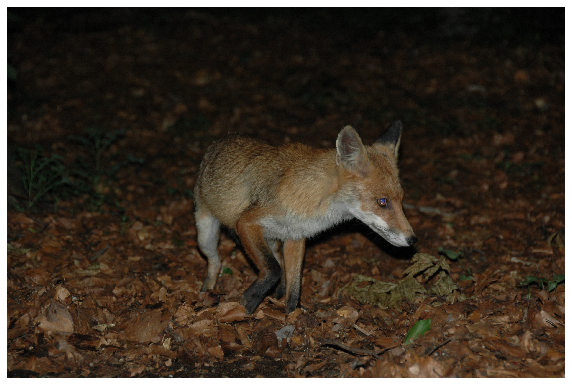

In [0]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pylab as plt

im = mpimg.imread(r"c:\Users\User\Documents\kepek\allat\Dsc_8579_roka.jpg") # Képállomány beovasása numpy ndarray

print(im.shape, im.dtype, type(im))     # ez a kép tartalmaz egy α csatornát//  num_channels= 4
# (960, 1280, 4) float32 <class 'numpy.ndarray'>
plt.figure(figsize=(10,10))
plt.imshow(im)               # megjelenítés
plt.axis('off')
plt.show()
plt.close()

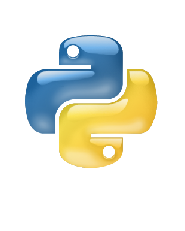

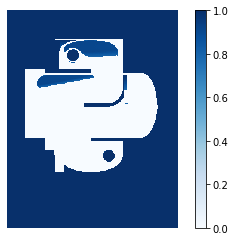

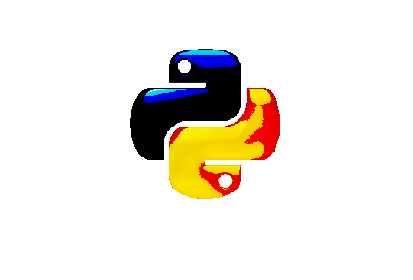

In [0]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pylab as plt

im = mpimg.imread(r"c:\Users\User\Documents\mintak\jupiter\kl\kepek\python-logo-glassy.png") # Képállomány beovasása
plt.imshow(im)
plt.axis('off')
plt.show()
im1 = im
im1[im1 < 0.8] = 0          # a kép elsőtétitése 
plt.imshow(im1)
plt.axis('off')  # ne legyen rács
plt.tight_layout()
plt.savefig(r"c:\Users\User\Documents\mintak\jupiter\kl\kepek\python-logo-glassy_dark.png") # sötétitett kép mentése állományba
plt.close()


plt.imshow(im[:,:,2],cmap='Blues') # a kek csatorna kekkel
plt.colorbar() #skala
plt.axis('off') # ne legyen rács
plt.show()
plt.imsave('out_mentett_kep.jpg',im)  # így mentünk jpg-be
plt.imsave('out_mentett_kep.png',im)  # így mentünk png-be
plt.imsave('out_mentett_kep.tiff',im) # így mentünk tiff-be

im = mpimg.imread(r"c:\Users\User\Documents\mintak\jupiter\kl\kepek\python-logo-glassy_dark.png") # ötétitett kép megnyítása
## plt.figure(figsize=(10,10))  ## méretezés
plt.imshow(im)
plt.axis('off') # ne legyen rács
plt.tight_layout()
plt.show()
plt.close()

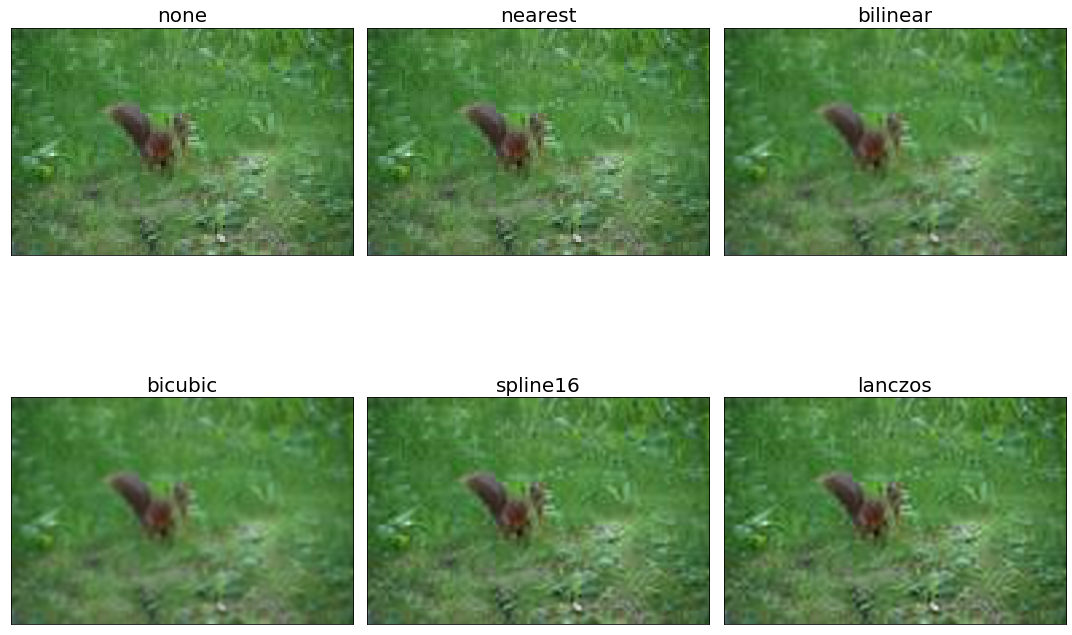

In [0]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pylab as plt

im = mpimg.imread(r"c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus_thumbnail.jpg") # read the image from disk as a numpy ndarray
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()
plt.close()

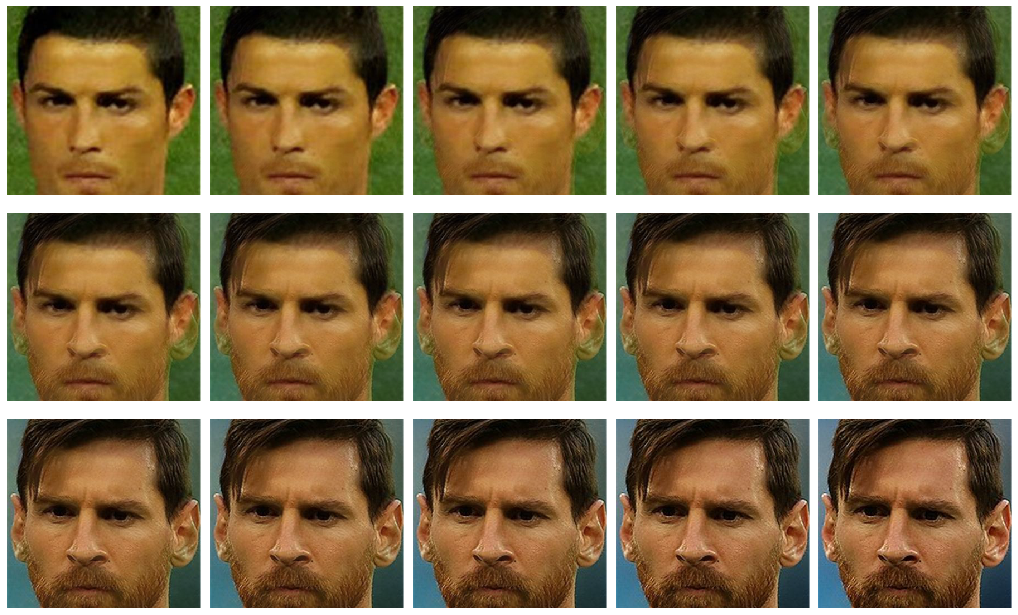

In [0]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np

## Áttűnés  két kép között
im1 = mpimg.imread(r"c:\Users\User\Documents\mintak\jupiter\kl\ronaldo.jpg") ##  255 # scale RGB values in [0,1]
im2 = mpimg.imread(r"c:\Users\User\Documents\mintak\jupiter\kl\messi.jpg") ##  255
i = 1
plt.figure(figsize=(18,15))
for alpha in np.linspace(0,1,15):  ## 15 lépéss beállítása
    plt.subplot(4,5,i)
    plt.imshow((1-alpha)*im1 + alpha*im2)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()
plt.close()

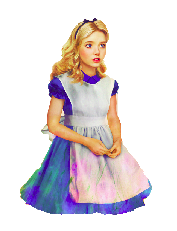

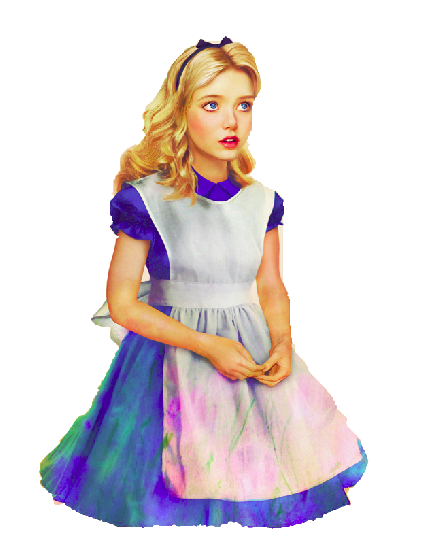

In [0]:
%matplotlib inline 
from PIL import Image
from skimage.io import imread, imshow, show
import matplotlib.pylab as pylab

im = Image.open(r'c:\Users\User\Documents\mintak\jupiter\kl\kepek\alice_color.png') # the original small clock image
pylab.axis('off'), pylab.imshow(im), pylab.show()
# pylab.close()

im1 = im.resize((im.width*5, im.height*5), Image.NEAREST) # nearest neighbor interpolation

pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.axis('off'), pylab.show()
pylab.close()

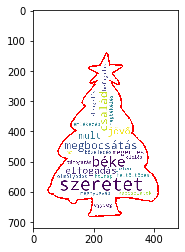

(<matplotlib.image.AxesImage at 0x1c00cf51d48>, None)

In [0]:
# WEB kép megnyitása
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import urllib.request

url = 'https://1.bp.blogspot.com/-LvQsQz0kOTU/XfyOEdINRWI/AAAAAAAAXxc/k1cZdGkTJnwYvkABO3oMxH10kKwx2edPwCLcBGAsYHQ/s1600/KL_karacsonyi_szofelho.png'
urllib.request.urlretrieve(url, 'kep_file.jpg')
im = Image.open('kep_file.jpg') # the original small clock image
pylab.imshow(im), pylab.show()

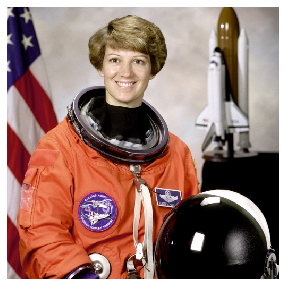

In [0]:
%matplotlib inline
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data

## skimage minta képmegjelenítése 
im = data.astronaut()
pylab.figure(figsize=(5,5)), pylab.imshow(im), pylab.axis('off'), pylab.show()
pylab.close()
# imshow(im), show()

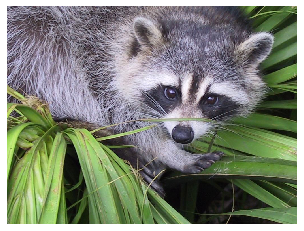

<Figure size 432x288 with 0 Axes>

In [0]:
%matplotlib inline
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from scipy import misc


im = misc.face()                             # moso medve arc beolvasása
plt.imshow(im), plt.axis('off'), plt.show()  # megjelenítés
plt.savefig('mosomedve.png')                 # kép metése a lemezterületre

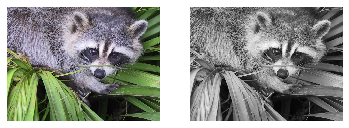

In [0]:
%matplotlib inline
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from scipy import misc

im = misc.face()  
im_g = color.rgb2gray(im)
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(im_g, cmap='gray'), plt.axis('off')
plt.show()

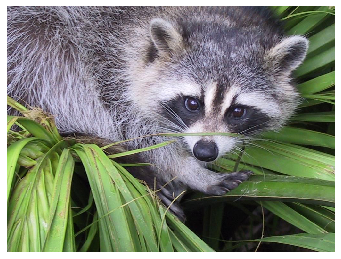

((-0.5, 1023.5, 767.5, -0.5), None)

In [0]:
%matplotlib inline
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from scipy import misc
import numpy as np

im = misc.face()  
im = np.array(im)        # numpy ndarray létrehozása a képből
imshow(im)               # skimage segítségével megjelenítés
plt.axis('off'), show()  # megjelenítés



## Kép felírat felhelyezése


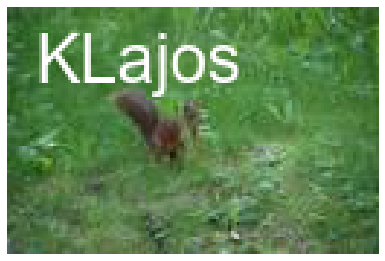

Kép statisztika :
extrema [(14, 255), (25, 255), (0, 255)]
count [10880, 10880, 10880]
mean [87.7640625, 128.58023897058823, 74.83492647058823]
median [81, 126, 67]
stddev [34.93996077890455, 30.35907345620685, 37.014709824297505]


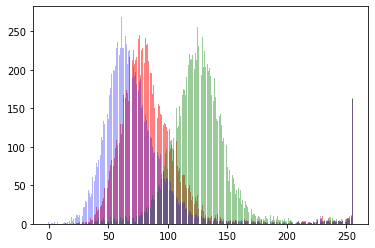

In [0]:
%matplotlib inline

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
from scipy import misc
import PIL.ImageStat as stat


im = Image.open(r"c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus_thumbnail.jpg") ## ('kep_file.jpg')
draw = ImageDraw.Draw(im)
font = ImageFont.truetype("arial.ttf", 23) # use a truetype font
draw.text((10, 5), "KLajos", font=font)
del draw
# im.show()
im_a = np.array(im)  
imshow(im_a)
plt.axis('off'), show()  # megjelenítés
s = stat.Stat(im)
print('Kép statisztika :')
print('extrema',s.extrema) # maximum and minimum pixel values for each channel R, G, B
print('count',s.count)
print('mean',s.mean)
print('median', s.median)
print('stddev',s.stddev)

pl = im.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()

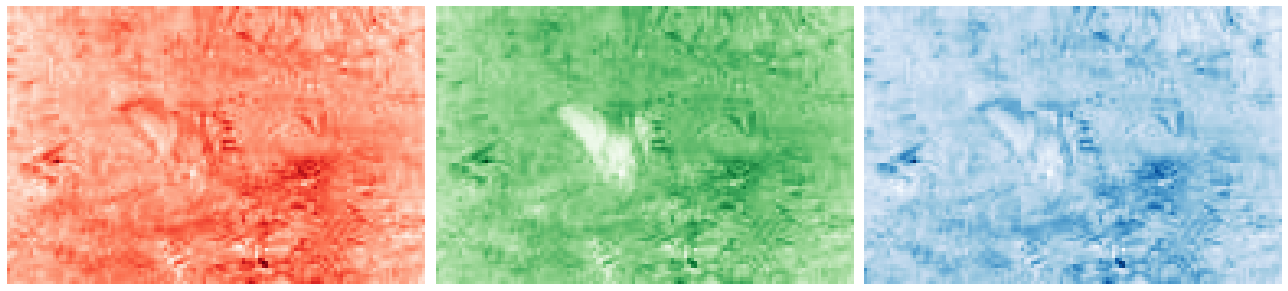

In [0]:
## szin csatornák kezelése
im = Image.open(r"c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus_thumbnail.jpg")
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B
# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels

Populating the interactive namespace from numpy and matplotlib
227.56509999999997 255.0


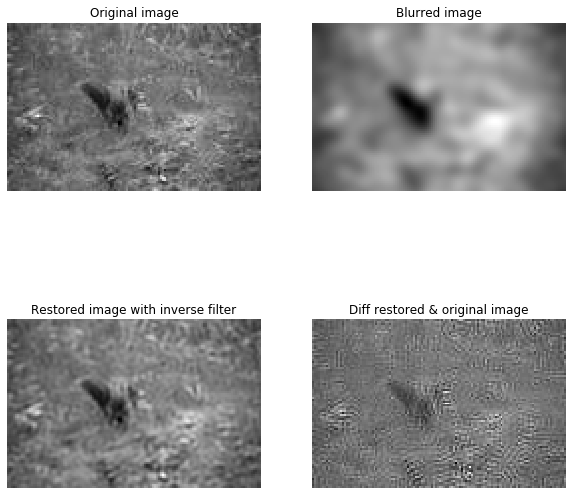

In [0]:
%matplotlib inline 
%pylab inline 
from PIL import Image
import scipy.fftpack as fp
from scipy import fftpack
from scipy import ndimage, misc, signal
from skimage.color import rgb2gray

#im = Image.open(r"c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus_thumbnail.jpg")
im = 255*rgb2gray(imread(r"c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus_thumbnail.jpg"))
epsilon = 10**-6

gauss_kernel = np.outer(signal.gaussian(im.shape[0], 3),
signal.gaussian(im.shape[1], 3))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel)) # this is our H
convolved = freq*freq_kernel # by convolution theorem

im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur) # normalize

freq = fp.fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel) # avoid division by zero
convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = 255 * im_restored / np.max(im_restored)
print(np.max(im), np.max(im_restored))
pylab.figure(figsize=(10,10))
pylab.gray()
pylab.subplot(221), pylab.imshow(im), pylab.title('Original image'), pylab.axis('off')
pylab.subplot(222), pylab.imshow(im_blur), pylab.title('Blurred image'), pylab.axis('off')
pylab.subplot(223), pylab.imshow(im_restored), pylab.title('Restored image with inverse filter'), pylab.axis('off')
pylab.subplot(224), pylab.imshow(im_restored - im), pylab.title('Diff restored & original image'), pylab.axis('off')
pylab.show()

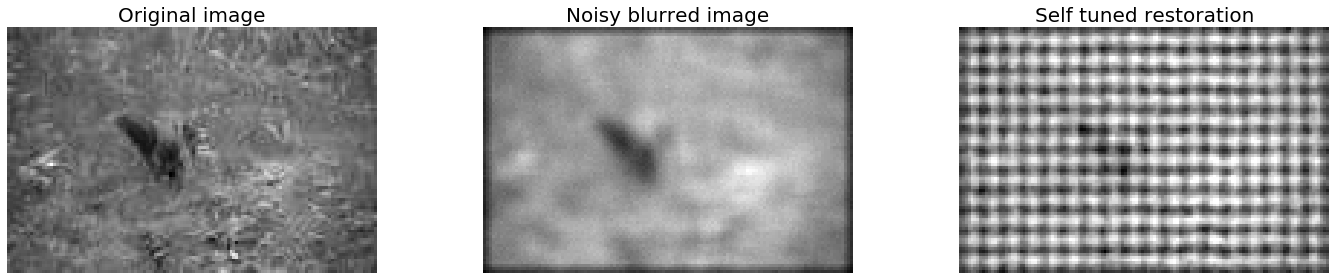

In [0]:
from skimage import color, data, restoration
im = color.rgb2gray(imread(r"c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus_thumbnail.jpg"))
from scipy.signal import convolve2d as conv2
n = 7
psf = np.ones((n, n)) / n**2
im1 = conv2(im, psf, 'same')
im1 += 0.1 * im1.std() * np.random.standard_normal(im1.shape)
im2, _ = restoration.unsupervised_wiener(im1, psf)
fig, axes = pylab.subplots(nrows=1, ncols=3, figsize=(20, 4), sharex=True, sharey=True)
pylab.gray()
axes[0].imshow(im), axes[0].axis('off'), axes[0].set_title('Original image', size=20)
axes[1].imshow(im1), axes[1].axis('off'), axes[1].set_title('Noisy blurred image', size=20)
axes[2].imshow(im2), axes[2].axis('off'), axes[2].set_title('Self tuned restoration', size=20)
fig.tight_layout()
pylab.show()

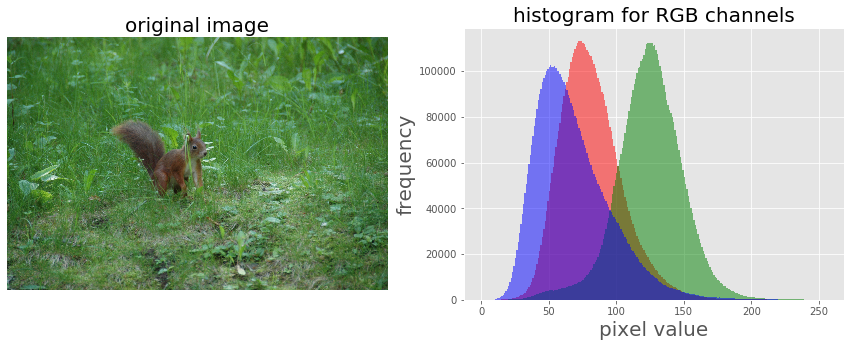

In [0]:
## szinkép tartomány
%matplotlib inline
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks
    
def plot_hist(r, g, b, title=''):
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=20), pylab.ylabel('frequency', size=20)
    pylab.title(title, size=20)
    
im = Image.open(r"c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus.jpg")
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121), plot_image(im, 'original image')
pylab.subplot(122), plot_hist(im_r, im_g, im_b,'histogram for RGB channels')
pylab.show()

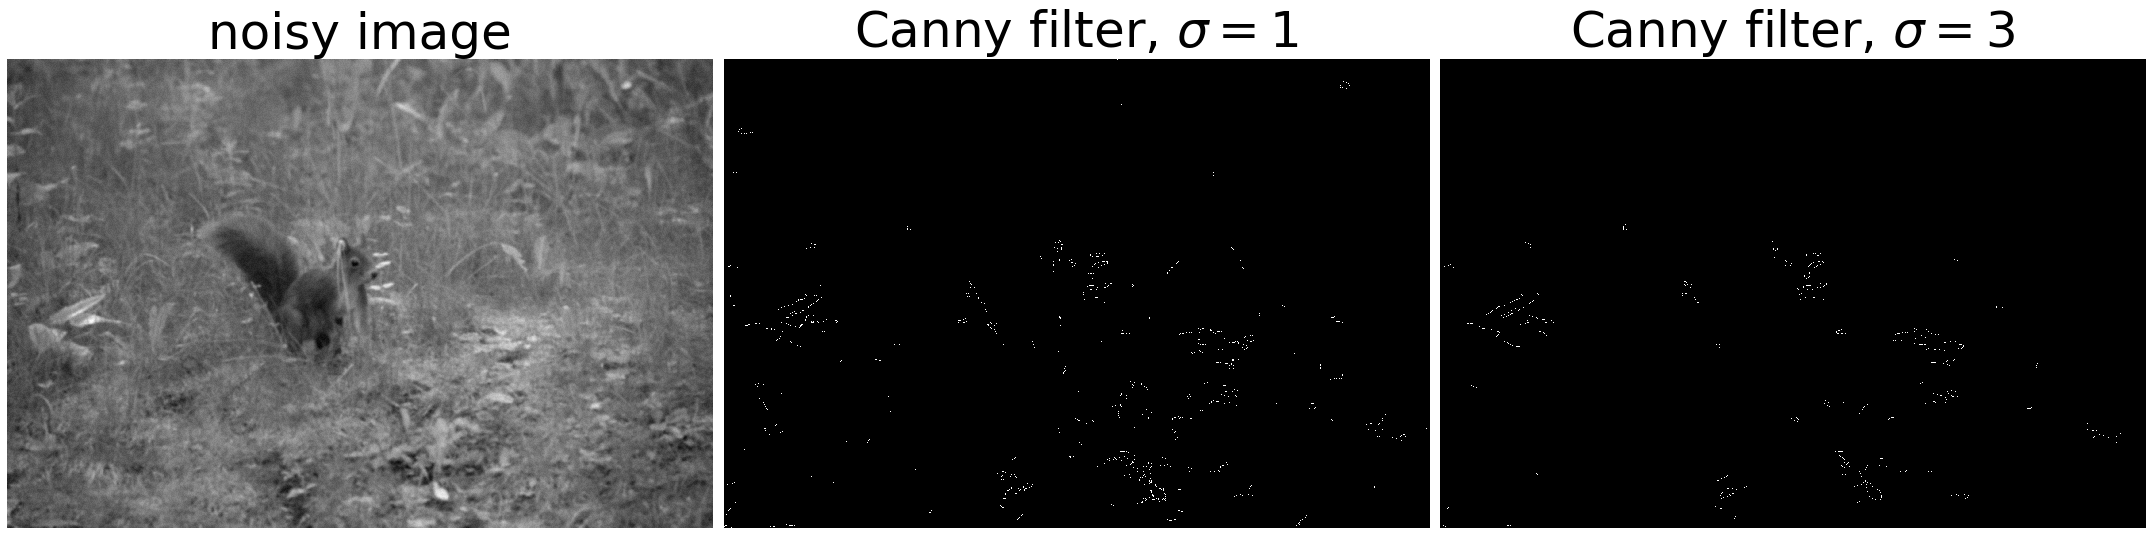

In [0]:
## éldetektálás
%matplotlib inline
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
im = rgb2gray(imread(r"c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus.jpg"))
im = ndimage.gaussian_filter(im, 4)
im += 0.05 * np.random.random(im.shape)
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=2)
fig, (axes1, axes2, axes3) = pylab.subplots(nrows=1, ncols=3, figsize=(30,
12), sharex=True, sharey=True)
axes1.imshow(im, cmap=pylab.cm.gray), axes1.axis('off'),
axes1.set_title('noisy image', fontsize=50)
axes2.imshow(edges1, cmap=pylab.cm.gray), axes2.axis('off')
axes2.set_title('Canny filter, $\sigma=1$', fontsize=50)
axes3.imshow(edges2, cmap=pylab.cm.gray), axes3.axis('off')
axes3.set_title('Canny filter, $\sigma=3$', fontsize=50)
fig.tight_layout()
pylab.show()

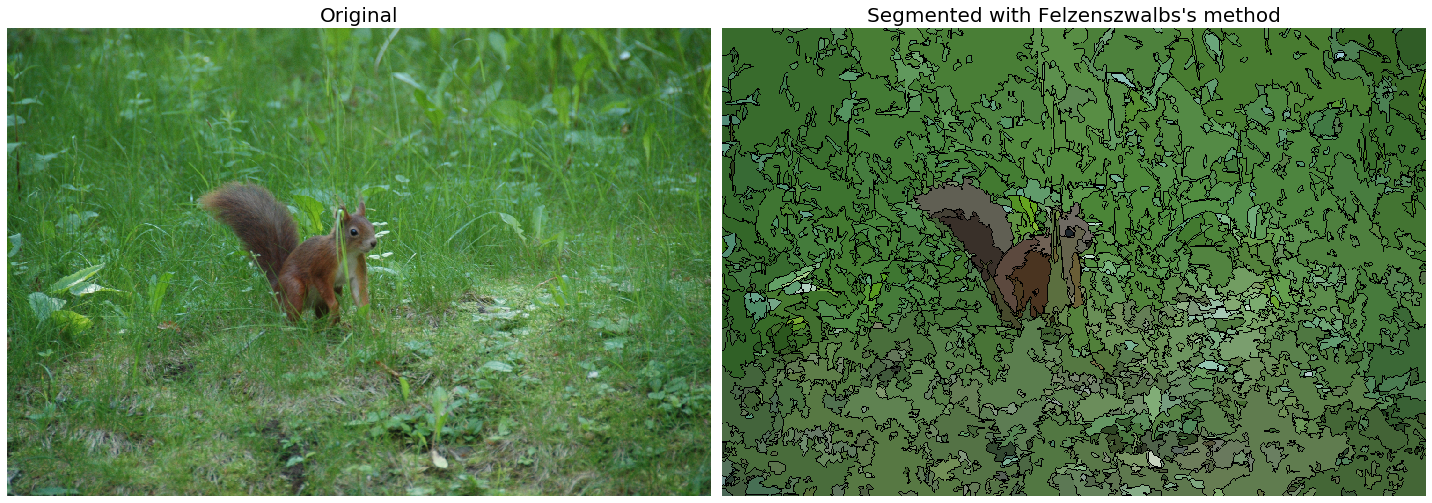

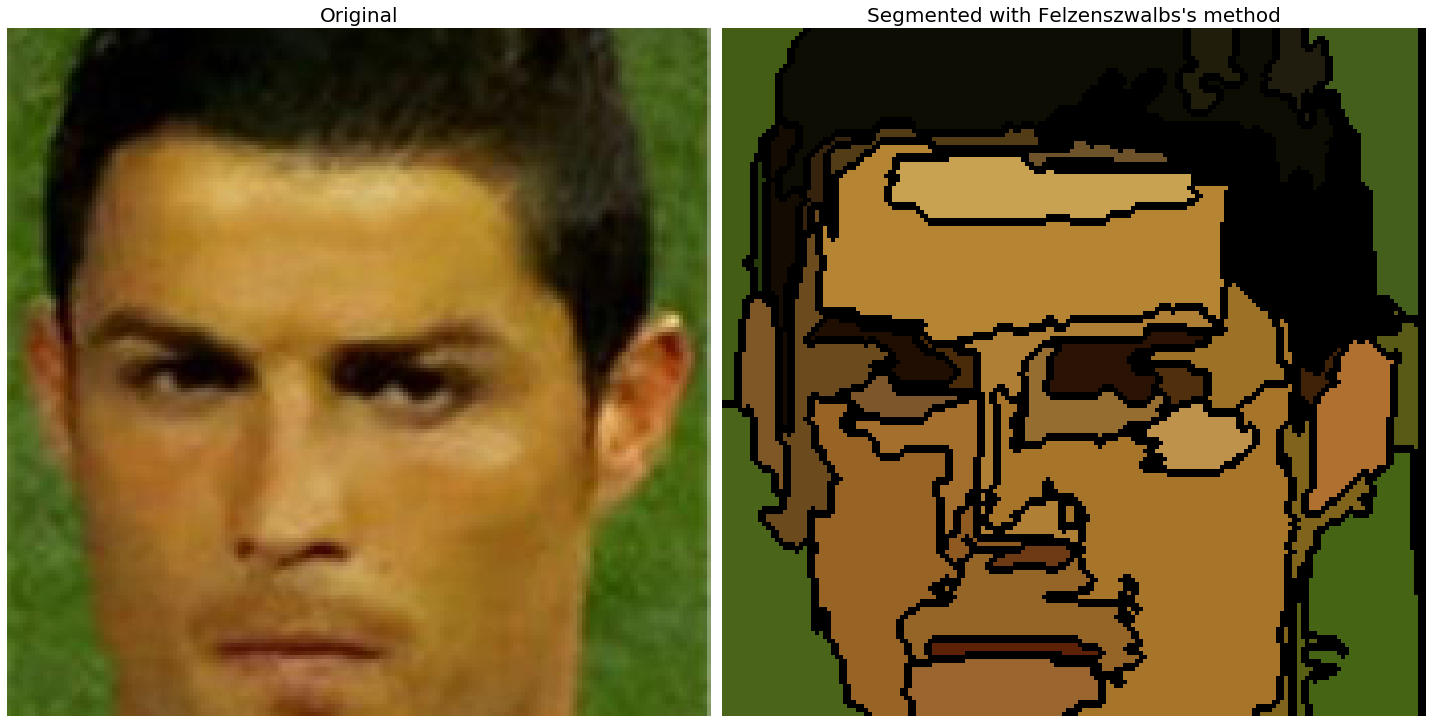

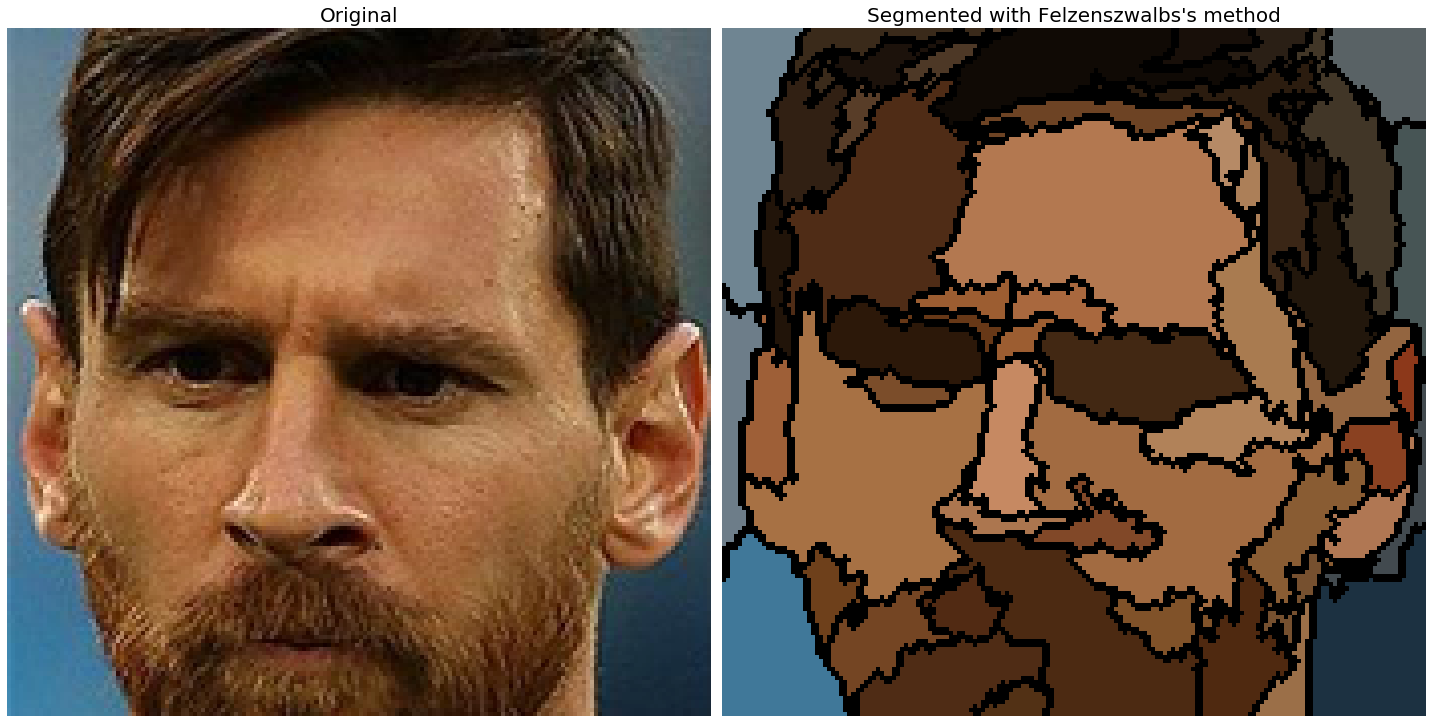

In [0]:
from skimage.data import astronaut
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.util import img_as_float

from matplotlib.colors import LinearSegmentedColormap
for imfile in [r"c:\Users\User\Documents\kepek\allat\Dsc_8596_mokus.jpg", r"c:\Users\User\Documents\mintak\jupiter\kl\ronaldo.jpg", r"c:\Users\User\Documents\mintak\jupiter\kl\messi.jpg"]:
    img = img_as_float(imread(imfile)[::2, ::2, :3])
    plt.figure(figsize=(20,10))
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=100) #300
    borders = find_boundaries(segments_fz)
    unique_colors = np.unique(segments_fz.ravel())
    segments_fz[borders] = -1 #len(unique_colors)
    colors = [np.zeros(3)]
    for color in unique_colors:
        colors.append(np.mean(img[segments_fz == color], axis=0))    
    cm = LinearSegmentedColormap.from_list('pallete', colors, N=len(colors))
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Original', size=20)
    plt.axis('off') 
    plt.subplot(122)
    plt.imshow(segments_fz, cmap=cm)
    plt.title('Segmented with Felzenszwalbs\'s method', size=20)
    plt.axis('off')   
    plt.tight_layout()
    plt.show()

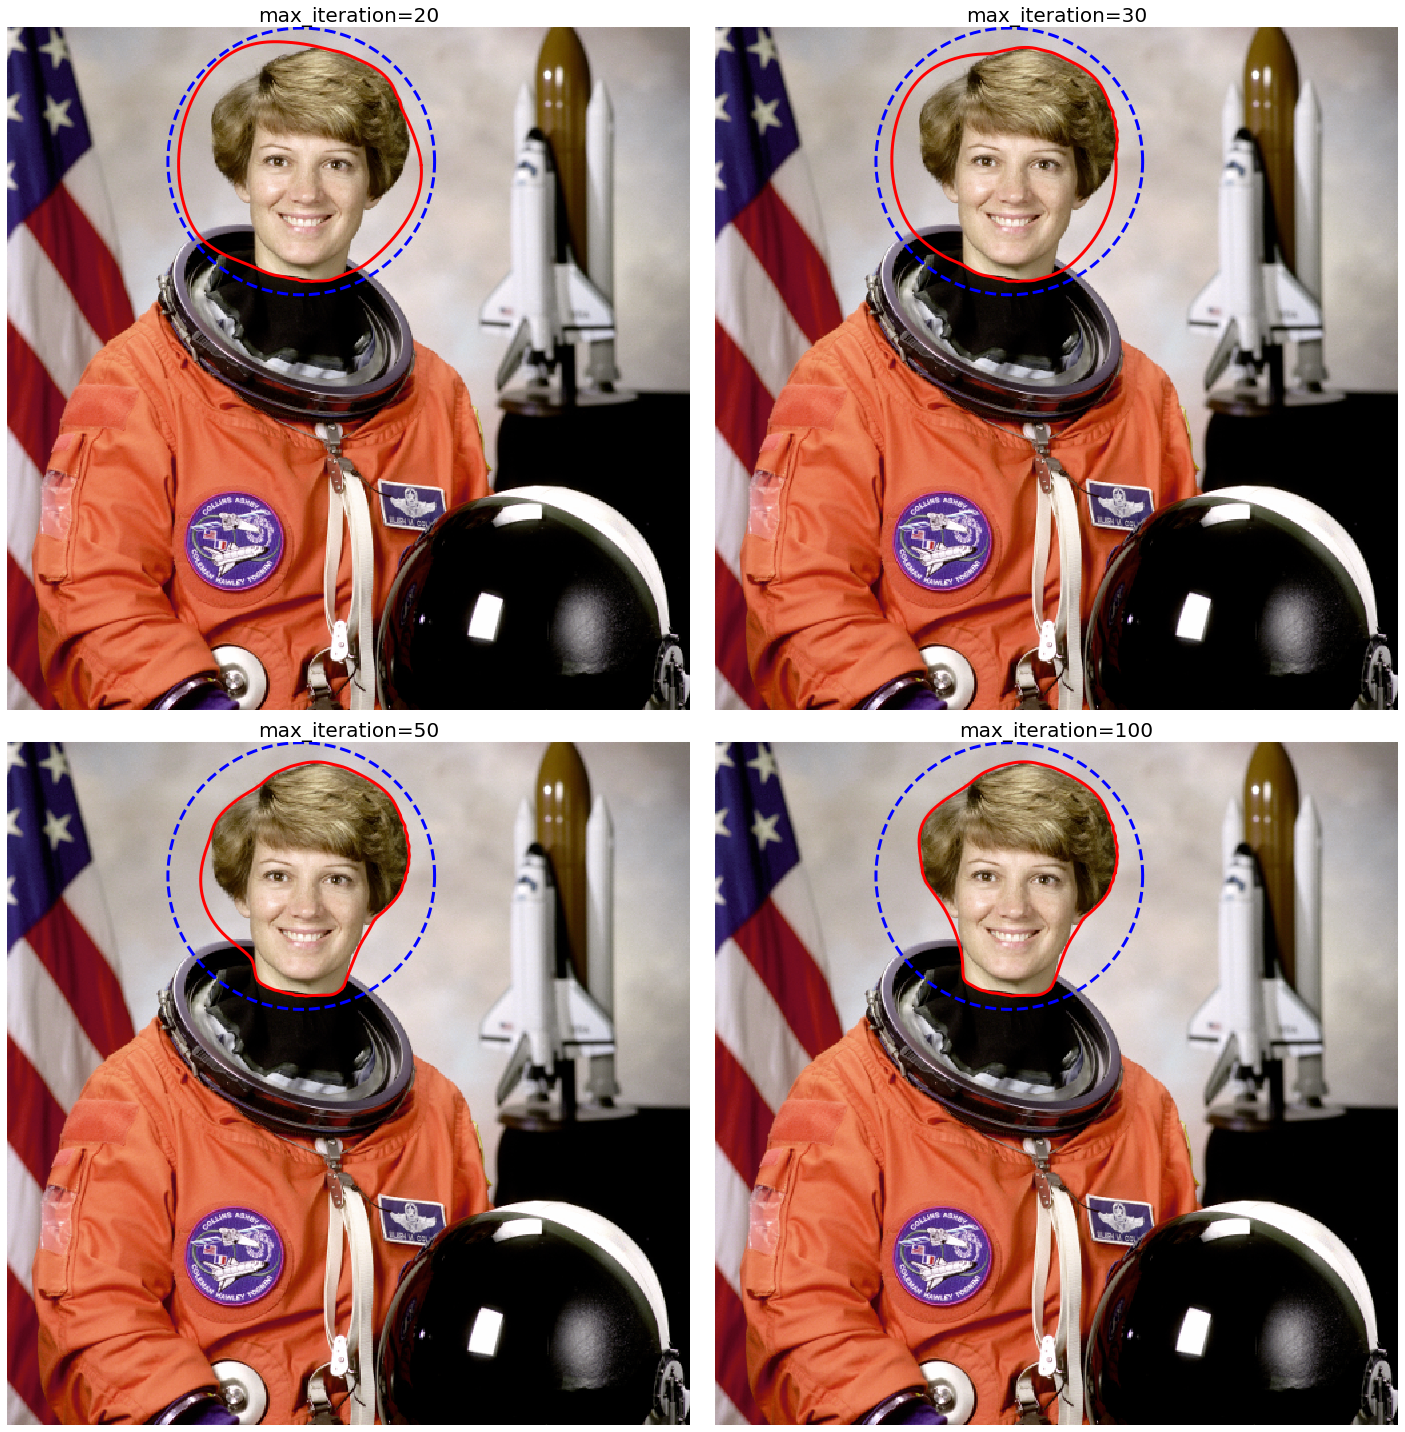

(None, None)

In [0]:
## Active contour keresés
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
img = data.astronaut()
img_gray = rgb2gray(img)
s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T
i = 1
plt.figure(figsize=(20,20))
for max_it in [20, 30, 50, 100]:
    snake = active_contour(gaussian(img_gray, 3), init, alpha=0.015, beta=10, gamma=0.001, max_iterations=max_it)
    plt.subplot(2,2,i), plt.imshow(img), plt.plot(init[:, 0], init[:,
    1], '--b', lw=3)
    plt.plot(snake[:, 0], snake[:, 1], '-r', lw=3)
    plt.axis('off'), plt.title('max_iteration=' + str(max_it), size=20)
    i += 1
plt.tight_layout(), plt.show()